In [1]:
# Import functions and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from function.backtest import backtest_strategy, plot_performance
from function.fetch_stock_data import fetch_stock_data

In [2]:
# Get the list of S&P 500 stocks
sp500_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
tickers = sp500_tickers['Symbol'].tolist()
securities = sp500_tickers['Security'].tolist()

# Ensure that Berkshire Hathaway's ticker is correctly formatted
# Yahoo Finance uses "-" instead of "."
tickers = [ticker.replace('.', '-') for ticker in tickers] 

In [3]:
# Set the date range for historical data
start_date = '2020-01-01'
end_date = '2023-01-01'

# Prepare lists to store results
total_pnl_list = []
sharpe_ratio_list = []
max_drawdown_list = []
cumulative_return_list = []
ticker_list = []
security_list = []

# Loop through each ticker and perform backtesting
for i in range(len(tickers)):

    ticker = tickers[i]
    security = securities[i]
    data = fetch_stock_data(ticker, start_date, end_date)

    if data is not None:
        # Calculate daily returns
        data['returns'] = data['Adj Close'].diff(1)

        # Generate trading signals based on moving averages
        short_window = 20
        long_window = 60
        # Check if number of rows of data is more than 60, otherwise our strategy won't work
        if data.shape[0] <= long_window:
            print(f'Insuffecient data for {ticker} ({security})')
            continue

        data['Short_MA'] = data['Adj Close'].rolling(window=short_window).mean()
        data['Long_MA'] = data['Adj Close'].rolling(window=long_window).mean()
        data['signals'] = 0
        starting_point = data.index[long_window]
        data.loc[starting_point:, 'signals'] = np.where(data.loc[starting_point:, 'Short_MA'] > data.loc[starting_point:, 'Long_MA'], 1, 0)

        # Drop NaN values from the DataFrame
        # data.dropna(inplace=True)
        
        # Apply the backtest function
        df_result, results = backtest_strategy(signals=data['signals'], returns=data['returns'], plot_charts=False)

        # Store the results for this ticker
        total_pnl_list.append(results['Total PnL'])
        sharpe_ratio_list.append(results['Sharpe Ratio'])
        max_drawdown_list.append(results['Max Drawdown'])
        cumulative_return_list.append(results['Cumulative Return'])
        ticker_list.append(ticker)
        security_list.append(security)

# Create a DataFrame to hold the aggregated results
results_df = pd.DataFrame({
    'Ticker': ticker_list,
    'Security': security_list,
    'Total PnL': total_pnl_list,
    'Sharpe Ratio': sharpe_ratio_list,
    'Max Drawdown': max_drawdown_list,
    'Cumulative Return': cumulative_return_list
})

# Display the aggregated results
results_df.sort_values(by='Cumulative Return', ascending=False, inplace=True)
results_df.head()


1 Failed download:
['AMTM']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2020-01-01 -> 2023-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1577854800, endDate = 1672549200")')


No data for AMTM
Insuffecient data for GEHC (GE HealthCare)



1 Failed download:
['GEV']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2020-01-01 -> 2023-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1577854800, endDate = 1672549200")')


No data for GEV



1 Failed download:
['KVUE']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2020-01-01 -> 2023-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1577854800, endDate = 1672549200")')


No data for KVUE



1 Failed download:
['SW']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2020-01-01 -> 2023-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1577854800, endDate = 1672549200")')


No data for SW



1 Failed download:
['SOLV']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2020-01-01 -> 2023-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1577854800, endDate = 1672549200")')


No data for SOLV



1 Failed download:
['VLTO']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2020-01-01 -> 2023-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1577854800, endDate = 1672549200")')


No data for VLTO


,Ticker,Security,Total PnL,Sharpe Ratio,Max Drawdown,Cumulative Return
346,NVR,"NVR, Inc.",1071.130127,0.352234,-0.971214,1071.130127
50,AZO,AutoZone,391.850159,0.351418,-0.900982,391.850159
311,MTD,Mettler Toledo,376.090088,0.487157,-1.032497,376.090088
15,ALGN,Align Technology,297.329910,0.654080,-inf,297.329910
348,ORLY,O'Reilly Auto Parts,262.880127,0.738222,-inf,262.880127


    Ticker                    Security    Total PnL  Sharpe Ratio  \
346    NVR                   NVR, Inc.  1071.130127      0.352234   
50     AZO                    AutoZone   391.850159      0.351418   
311    MTD              Mettler Toledo   376.090088      0.487157   
15    ALGN            Align Technology   297.329910      0.654080   
348   ORLY         O'Reilly Auto Parts   262.880127      0.738222   
141     DE             Deere & Company   237.810989      1.062114   
394   REGN   Regeneron Pharmaceuticals   223.549957      0.501398   
171   EPAM                EPAM Systems   211.190018      0.497862   
98     CRL  Charles River Laboratories   199.130005      1.081135   
243   IDXX          Idexx Laboratories   189.829987      0.576529   

     Max Drawdown  Cumulative Return  
346     -0.971214        1071.130127  
50      -0.900982         391.850159  
311     -1.032497         376.090088  
15           -inf         297.329910  
348          -inf         262.880127  
141   

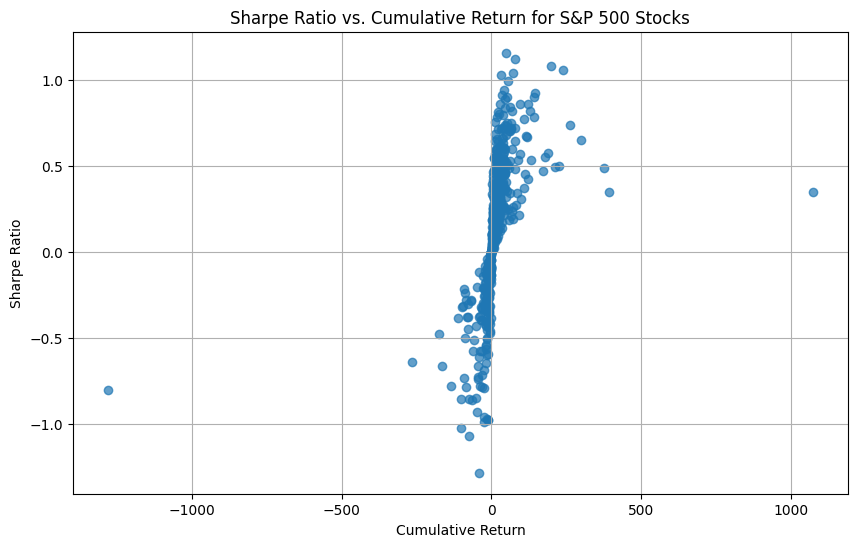

<Figure size 1000x600 with 0 Axes>

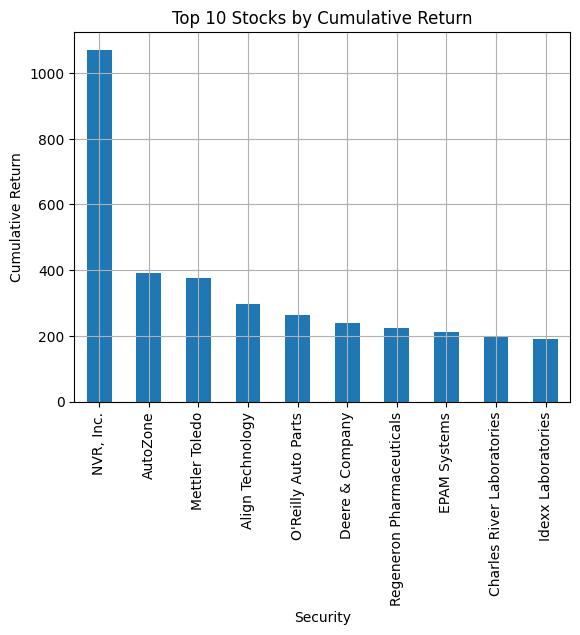

<Figure size 1000x600 with 0 Axes>

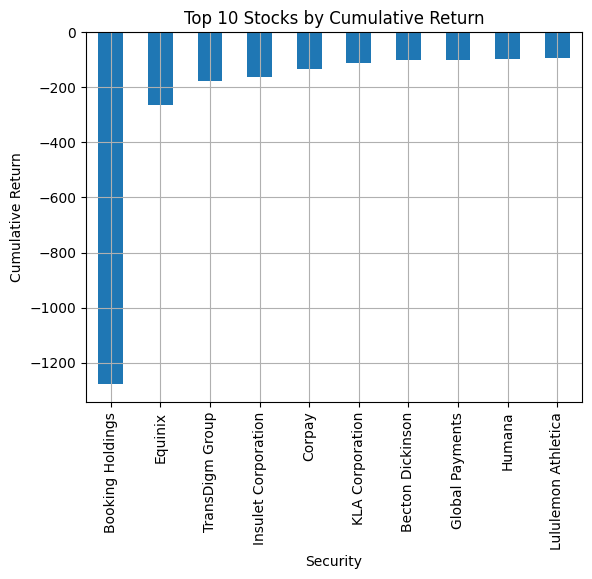

In [6]:
# Show top 10 stocks by cumulative return
top_performers = results_df.nlargest(10, 'Cumulative Return')
bottom_performers = results_df.nsmallest(10, 'Cumulative Return')
print(top_performers)

# Plot the Sharpe Ratio vs. Cumulative Return for each stock
plt.figure(figsize=(10, 6))
plt.scatter(results_df['Cumulative Return'], results_df['Sharpe Ratio'], alpha=0.7)
plt.title('Sharpe Ratio vs. Cumulative Return for S&P 500 Stocks')
plt.xlabel('Cumulative Return')
plt.ylabel('Sharpe Ratio')
plt.grid(True)
plt.show()

# Plot a bar chart of top 10 stocks by Cumulative Return
plt.figure(figsize=(10, 6))
top_performers.plot(kind='bar', x='Security', y='Cumulative Return', legend=False)
plt.title('Top 10 Stocks by Cumulative Return')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.show()

# Plot a bar chart of top 10 stocks by Cumulative Return
plt.figure(figsize=(10, 6))
bottom_performers.plot(kind='bar', x='Security', y='Cumulative Return', legend=False)
plt.title('Top 10 Stocks by Cumulative Return')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.show()